# Capstone Project 2

Here are some relevant links:

-------------------------------------------------------------------------------------------------

Capstone Project Proposal: https://docs.google.com/document/d/1yuYfevcNKGCiMMpC0tMg26LN1if72PoiavPpJ42Z_Jk/edit?usp=sharing

Capstone Project Milestone Report: https://docs.google.com/document/d/13384gNjzFhoJdPQnSEUdAIN7TfYW_rC7lyaQNrp2eKU/edit?usp=sharing

Capstone Project Powerpoint Presentation: https://docs.google.com/presentation/d/1yZrLBOMlTMyDIW6vE5OyXQpOqjvxUQRTbMgKXez0RPc/edit?usp=sharing

Capstone Project Technical Report: https://docs.google.com/document/d/1XE4s3Db8_LBhr6Lq_nhSlw7ldr1YwHMMNT_9LilTXeM/edit?usp=sharing


---------------------------------------------------------------------------------------

In [1]:
# Pull the data into this Python session:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

DF2015 = pd.read_csv('2015_.csv')
DF2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Trust_aka_Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
DF2016 = pd.read_csv('2016_.csv')
DF2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Trust_aka_Government_Corruption,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
DF2017 = pd.read_csv('2017_.csv')
DF2017.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Generosity,Trust_aka_Government_Corruption,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In this case, since the 2017 DataFrame doesn't have the 'Region' variable, I am simply going to add it from a previous year's DataFrame (2016):

In [4]:
DF2017 = pd.read_csv('2017_.csv')
DF2017 = DF2017.merge(DF2016, on = 'Country')
DF2017.drop(DF2017.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
DF2017 = DF2017[['Country', 'Region', 'Happiness_Rank_x', 'Happiness_Score_x', 'Whisker_high', 'Whisker_low', 'Economy_aka_GDP_per_Capita_x', 'Family_x', 'Health_aka_Life_Expectancy_x', 'Freedom_x', 'Generosity_x', 'Trust_aka_Government_Corruption_x', 'Dystopia_Residual_x']]
DF2017.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high', 'Whisker_low', 'Economy_aka_GDP_per_Capita', 'Family', 'Health_aka_Life_Expectancy', 'Freedom', 'Generosity', 'Trust_aka_Government_Corruption', 'Dystopia_Residual']
DF2017.head()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Generosity,Trust_aka_Government_Corruption,Dystopia_Residual
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Now, I will create variabes which contain the DataFrame where all rows that contain missing values will be dropped:

In [5]:
DF2015Drop_All = DF2015.dropna()
DF2016Drop_All = DF2016.dropna()
DF2017Drop_All = DF2017.dropna()

Now, I will plot the countries' Happiness Scores to get a feel for the data as a whole:

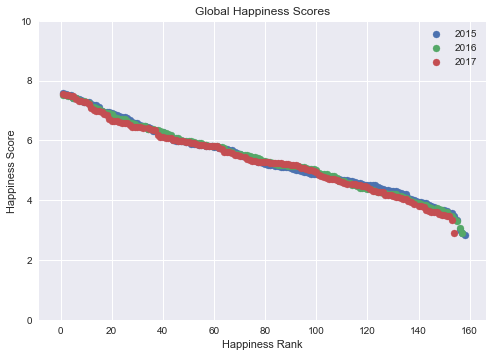

In [6]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Happiness_Score, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Happiness_Score, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Happiness_Score, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Happiness Score")
plt.title("Global Happiness Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


The graph shows that the slope generally stays around -2/75 each year.

Next, I will create graphs of the other variable to see how they compare:

In [7]:
DF2017.head()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Generosity,Trust_aka_Government_Corruption,Dystopia_Residual
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


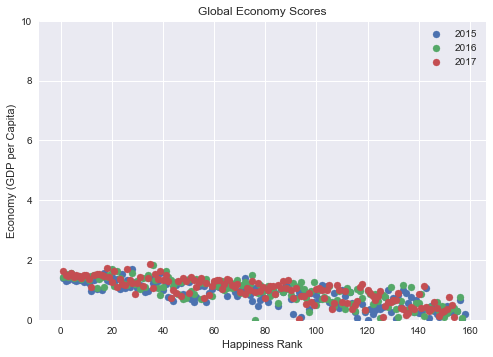

In [8]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Economy_aka_GDP_per_Capita, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Economy_aka_GDP_per_Capita, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Economy_aka_GDP_per_Capita, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Economy (GDP per Capita)")
plt.title("Global Economy Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


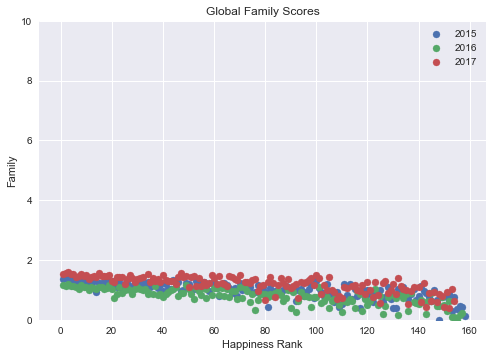

In [9]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Family, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Family, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Family, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Family")
plt.title("Global Family Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


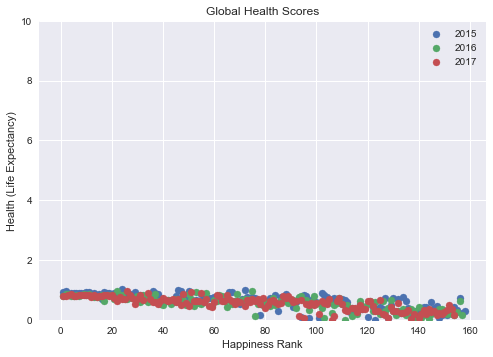

In [10]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Health_aka_Life_Expectancy, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Health_aka_Life_Expectancy, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Health_aka_Life_Expectancy, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Health (Life Expectancy)")
plt.title("Global Health Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


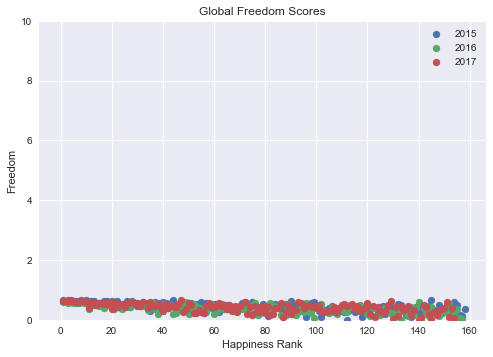

In [11]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Freedom, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Freedom, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Freedom, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Freedom")
plt.title("Global Freedom Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


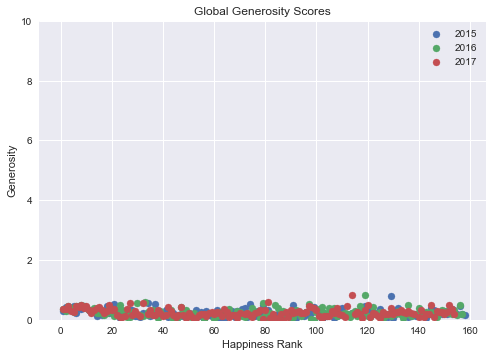

In [12]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Generosity, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Generosity, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Generosity, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Generosity")
plt.title("Global Generosity Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


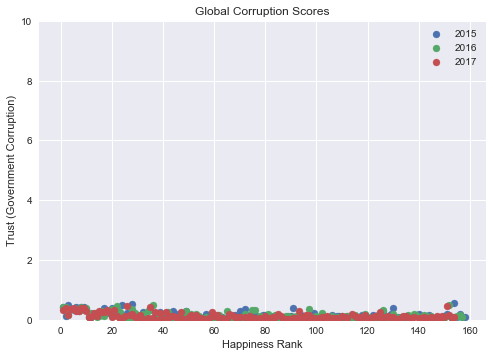

In [13]:
plt.scatter(DF2015Drop_All.Happiness_Rank, DF2015Drop_All.Trust_aka_Government_Corruption, marker='o', label='2015')
plt.scatter(DF2016Drop_All.Happiness_Rank, DF2016Drop_All.Trust_aka_Government_Corruption, marker='o', label='2016')
plt.scatter(DF2017Drop_All.Happiness_Rank, DF2017Drop_All.Trust_aka_Government_Corruption, marker='o', label='2017')

plt.xlabel("Happiness Rank")
plt.ylabel("Trust (Government Corruption)")
plt.title("Global Corruption Scores")
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.show()


We see some loose correlation with Economy, Family, and Life Expectancy Scores, but there isn't much noticable correlation with Freedom (although consistently high with the top ~10 countries), Generosity, and Government Trust scores

Just to be sure, let's have a look at the correlation values for each year:

In [14]:
print("---------------------------------------------------------------------------------------")
print("2015 Correlation Values:")

cm = sns.light_palette("green", as_cmap=True)
s = DF2015Drop_All.corr().style.background_gradient(cmap=cm)
s

---------------------------------------------------------------------------------------
2015 Correlation Values:


,Happiness_Rank,Happiness_Score,Standard_Error,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Trust_aka_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Rank,1,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1,-0.177254,0.780966,0.740605,0.7242,0.568211,0.395199,0.180319,0.530474
Standard_Error,0.158516,-0.177254,1,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.0884387,0.0839809
Economy_aka_GDP_per_Capita,-0.785267,0.780966,-0.217651,1,0.645299,0.816478,0.3703,0.307885,-0.0104654,0.0400588
Family,-0.733644,0.740605,-0.120728,0.645299,1,0.531104,0.441518,0.205605,0.0875132,0.148117
Health_aka_Life_Expectancy,-0.735613,0.7242,-0.310287,0.816478,0.531104,1,0.360477,0.248335,0.108335,0.0189793
Freedom,-0.556886,0.568211,-0.129773,0.3703,0.441518,0.360477,1,0.493524,0.373916,0.0627834
Trust_aka_Government_Corruption,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1,0.276123,-0.0331046
Generosity,-0.160142,0.180319,-0.0884387,-0.0104654,0.0875132,0.108335,0.373916,0.276123,1,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.0839809,0.0400588,0.148117,0.0189793,0.0627834,-0.0331046,-0.101301,1


In [15]:
print("---------------------------------------------------------------------------------------")
print("2016 Correlation Values:")

cm = sns.light_palette("green", as_cmap=True)
s = DF2016Drop_All.corr().style.background_gradient(cmap=cm)
s

---------------------------------------------------------------------------------------
2016 Correlation Values:


,Happiness_Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Trust_aka_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Rank,1,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness_Score,-0.995743,1,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower_Confidence_Interval,-0.994928,0.999485,1,0.997919,0.790673,0.741523,0.769177,0.566857,0.40484,0.158025,0.538793
Upper_Confidence_Interval,-0.995525,0.999474,0.997919,1,0.78914,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy_aka_GDP_per_Capita,-0.793577,0.790322,0.790673,0.78914,1,0.66954,0.837067,0.362283,0.294185,-0.0255307,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.66954,1,0.588377,0.450208,0.213561,0.0896289,0.119672
Health_aka_Life_Expectancy,-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1,0.341199,0.249583,0.0759873,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1,0.502054,0.361751,0.0916309
Trust_aka_Government_Corruption,-0.387102,0.402032,0.40484,0.398775,0.294185,0.213561,0.249583,0.502054,1,0.30593,-0.00290935
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.0255307,0.0896289,0.0759873,0.361751,0.30593,1,-0.133001


In [16]:
print("---------------------------------------------------------------------------------------")
print("2017 Correlation Values:")

cm = sns.light_palette("green", as_cmap=True)
s = DF2017Drop_All.corr().style.background_gradient(cmap=cm)
s

---------------------------------------------------------------------------------------
2017 Correlation Values:


,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Generosity,Trust_aka_Government_Corruption,Dystopia_Residual
Happiness_Rank,1,-0.993863,-0.994122,-0.992751,-0.810925,-0.741944,-0.778987,-0.558714,-0.134634,-0.417292,-0.511498
Happiness_Score,-0.993863,1,0.999556,0.999572,0.808013,0.747616,0.778304,0.578406,0.160384,0.442291,0.506639
Whisker_high,-0.994122,0.999556,1,0.998256,0.808642,0.746108,0.774911,0.576932,0.160373,0.438541,0.508735
Whisker_low,-0.992751,0.999572,0.998256,1,0.806698,0.748451,0.780961,0.579352,0.160256,0.445588,0.504145
Economy_aka_GDP_per_Capita,-0.810925,0.808013,0.808642,0.806698,1,0.675163,0.83165,0.375743,-0.0232999,0.356151,0.0593484
Family,-0.741944,0.747616,0.746108,0.748451,0.675163,1,0.602375,0.433749,0.065277,0.236054,0.100161
Health_aka_Life_Expectancy,-0.778987,0.778304,0.774911,0.780961,0.83165,0.602375,1,0.359725,0.0568294,0.282628,0.092888
Freedom,-0.558714,0.578406,0.576932,0.579352,0.375743,0.433749,0.359725,1,0.315447,0.495048,0.0942454
Generosity,-0.134634,0.160384,0.160373,0.160256,-0.0232999,0.065277,0.0568294,0.315447,1,0.288277,-0.112874
Trust_aka_Government_Corruption,-0.417292,0.442291,0.438541,0.445588,0.356151,0.236054,0.282628,0.495048,0.288277,1,0.00589697


As expected by our EDA with the scatterplots, there is a high correlation value associated with Economy, Family, and Health against Happiness Score, each being in the 0.7 - 0.8 range.  In addition, Freedom shows a score of 0.56 - 0.57, while Generosity is 0.15 - 0.18, and Trust is 0.40 - 0.44

Economy definitely takes the lead for consistently having a higher correlation each year of 0.78 - 0.80, so I think that this will be the best predictor to use for a machine learning model later on.

Now, I think that it will be a good idea to see what some of the statisical values (such as mean, standard deviation, etc) are for each year:

In [17]:
print("------------------------------------------------------------------------------------")
print("2015 Stats:")

DF2015Drop_All.describe()

------------------------------------------------------------------------------------
2015 Stats:


,Happiness_Rank,Happiness_Score,Standard_Error,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Trust_aka_Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [18]:
print("------------------------------------------------------------------------------------")
print("2016 Stats:")

DF2016Drop_All.describe()

------------------------------------------------------------------------------------
2016 Stats:


,Happiness_Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Trust_aka_Government_Corruption,Generosity,Dystopia_Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [19]:
print("------------------------------------------------------------------------------------")
print("2017 Stats:")

DF2017Drop_All.describe()

------------------------------------------------------------------------------------
2017 Stats:


,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy_aka_GDP_per_Capita,Family,Health_aka_Life_Expectancy,Freedom,Generosity,Trust_aka_Government_Corruption,Dystopia_Residual
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,77.193333,5.379520,5.475886,5.283154,0.992605,1.197140,0.557302,0.409114,0.245823,0.122472,1.855028
std,44.666053,1.116386,1.106292,1.127453,0.409519,0.273425,0.226623,0.151753,0.136252,0.102033,0.493360
min,1.000000,2.905000,3.074690,2.735310,0.022643,0.396103,0.005565,0.000000,0.000000,0.000000,0.377914
25%,39.250000,4.519250,4.616703,4.379207,0.718908,1.049448,0.398654,0.302209,0.152324,0.057170,1.601559
50%,77.500000,5.286000,5.380905,5.193687,1.066948,1.254751,0.609627,0.438880,0.231225,0.089565,1.829808
75%,115.750000,6.103250,6.195921,6.012285,1.315027,1.419041,0.717596,0.519885,0.323955,0.152636,2.147727
max,154.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


The mean and standard deviation for the columns seems to be very similar across the years.  One thing that stood out to me was that Economy has the highest standard deviation for all three years

Next, I will create a predictive model utilizing the "Economy" scores 

In [20]:
# First, I will merge the dataframes for all three years:
DFML = [DF2015Drop_All, DF2016Drop_All, DF2017Drop_All]
DFML = pd.concat(DFML)
DFML

,Country,Dystopia_Residual,Economy_aka_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_aka_Life_Expectancy,Lower_Confidence_Interval,Region,Standard_Error,Trust_aka_Government_Corruption,Upper_Confidence_Interval,Whisker_high,Whisker_low
0,Switzerland,2.517380,1.396510,1.349510,0.665570,0.296780,1,7.587,0.941430,NaN,Western Europe,0.03411,0.419780,NaN,NaN,NaN
1,Iceland,2.702010,1.302320,1.402230,0.628770,0.436300,2,7.561,0.947840,NaN,Western Europe,0.04884,0.141450,NaN,NaN,NaN
2,Denmark,2.492040,1.325480,1.360580,0.649380,0.341390,3,7.527,0.874640,NaN,Western Europe,0.03328,0.483570,NaN,NaN,NaN
3,Norway,2.465310,1.459000,1.330950,0.669730,0.346990,4,7.522,0.885210,NaN,Western Europe,0.03880,0.365030,NaN,NaN,NaN
4,Canada,2.451760,1.326290,1.322610,0.632970,0.458110,5,7.427,0.905630,NaN,North America,0.03553,0.329570,NaN,NaN,NaN
5,Finland,2.619550,1.290250,1.318260,0.641690,0.233510,6,7.406,0.889110,NaN,Western Europe,0.03140,0.413720,NaN,NaN,NaN
6,Netherlands,2.465700,1.329440,1.280170,0.615760,0.476100,7,7.378,0.892840,NaN,Western Europe,0.02799,0.318140,NaN,NaN,NaN
7,Sweden,2.371190,1.331710,1.289070,0.659800,0.362620,8,7.364,0.910870,NaN,Western Europe,0.03157,0.438440,NaN,NaN,NaN
8,New Zealand,2.264250,1.250180,1.319670,0.639380,0.475010,9,7.286,0.908370,NaN,Australia and New Zealand,0.03371,0.429220,NaN,NaN,NaN
9,Australia,2.266460,1.333580,1.309230,0.651240,0.435620,10,7.284,0.931560,NaN,Australia and New Zealand,0.04083,0.356370,NaN,NaN,NaN


In [21]:
y = DFML.Happiness_Score
X_Economy = DFML.Economy_aka_GDP_per_Capita

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_Economy.shape))

# Reshape X and y
y = y.reshape(-1,1)
X_Economy = X_Economy.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X_Economy.shape))

Dimensions of y before reshaping: (465,)
Dimensions of X before reshaping: (465,)
Dimensions of y after reshaping: (465, 1)
Dimensions of X after reshaping: (465, 1)


C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


R^2 Value:
0.614505557433


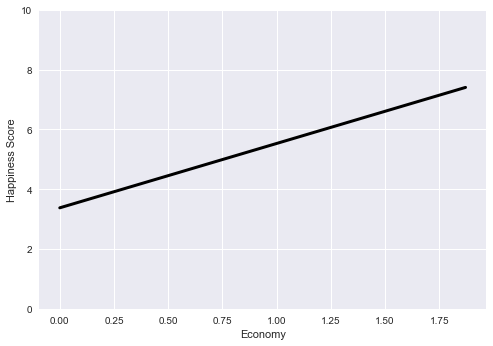

In [22]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_Economy), max(X_Economy)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_Economy, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('R^2 Value:')
print(reg.score(X_Economy, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Economy")
plt.ylabel("Happiness Score")
plt.ylim([0,10])
plt.show()


In [23]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_Economy, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.6137075298700322
Root Mean Squared Error: 0.7187790636607835


In [24]:
# Now I will cross-validate the scores:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_Economy, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[-0.23122674  0.71264814 -0.13524379  0.72861017 -0.17417748]
Average 5-Fold CV Score: 0.18012205918755822


The machine learning model has a RMSE of 0.7188, which isn't very good in my opinion.  Let's create 5 more predictive models - each having a different feature variable:

In [25]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_Family = DFML.Family
X_Family = X_Family.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_Family, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_Family, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.4188973980191888
Root Mean Squared Error: 0.8815840159180256
[-0.26626249  0.30861377 -0.96451403  0.75873794 -2.55677108]
Average 5-Fold CV Score: -0.5440391803521963


C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [26]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_Freedom = DFML.Freedom
X_Freedom = X_Freedom.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_Freedom, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_Freedom, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.28878480826024144
Root Mean Squared Error: 0.9752990690358583
[-0.19142902  0.20963181 -0.70359824  0.44250547 -1.06625562]
Average 5-Fold CV Score: -0.26182912287611604


C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [27]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_Generosity = DFML.Generosity
X_Generosity = X_Generosity.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_Generosity, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_Generosity, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.007813526700932605
Root Mean Squared Error: 1.1519508465971768
[-1.48919927 -0.01266484 -0.35161129  0.03157835 -1.73073654]
Average 5-Fold CV Score: -0.710526719700228


C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [28]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_Health = DFML.Health_aka_Life_Expectancy
X_Health = X_Health.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_Health, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_Health, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.6052655049512639
Root Mean Squared Error: 0.7265907043301345
[ 0.26851635  0.46776772 -0.2491069   0.6447569   0.05954762]
Average 5-Fold CV Score: 0.23829633631827166


C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [29]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_Trust = DFML.Trust_aka_Government_Corruption
X_Trust = X_Trust.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_Trust, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_Trust, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.2143963539086582
Root Mean Squared Error: 1.0250358209044024
[-0.84570446  0.13168538 -0.34032382  0.14321139 -1.10668702]
Average 5-Fold CV Score: -0.40356370608783354


C:\Users\Brad Eledge\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Let's see if we can create a model using all of the relevant feature variables available to us in the same model:

In [30]:
DFML.head()

,Country,Dystopia_Residual,Economy_aka_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_aka_Life_Expectancy,Lower_Confidence_Interval,Region,Standard_Error,Trust_aka_Government_Corruption,Upper_Confidence_Interval,Whisker_high,Whisker_low
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN


In [31]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_All = DFML[['Economy_aka_GDP_per_Capita', 'Family', 'Freedom', 'Generosity', 'Health_aka_Life_Expectancy', 'Trust_aka_Government_Corruption']]

X_train, X_test, y_train, y_test = train_test_split(X_All, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_All, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.7794637010628193
Root Mean Squared Error: 0.5430969180449441
[ 0.49336959  0.73833086  0.08440199  0.86791335 -0.00572359]
Average 5-Fold CV Score: 0.4356584383189526


Looks like this has definitely improves our model.  Our new RMSE is 0.5431 when we use all of the feature variables available to us

Now, let's experiment a little more, and see if we can create a more accurate model by selecting the top three most highly correlate values that we found from our EDA: Economy, Family, and Health:

In [32]:
X_T3 = DFML[['Economy_aka_GDP_per_Capita', 'Family', 'Health_aka_Life_Expectancy',]]

X_train, X_test, y_train, y_test = train_test_split(X_T3, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_All, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.7264069558573865
Root Mean Squared Error: 0.6049086894300473
[ 0.49336959  0.73833086  0.08440199  0.86791335 -0.00572359]
Average 5-Fold CV Score: 0.4356584383189526


The RMSE of 0.6050 for this model was still better than using just Economy as a feature variable (RMSE = 0.7188), however it is still not as good as the model that used all 6 feature variables (RMSE = 0.5431)

Just out of curiosity, I'm going to see how well a model that uses the three variables with the lowest correlation values from our previous EDA (Freedom, Generosity, Trust).

In [33]:
# Create X (feature) variable which will contain all of the relevant features available to us.  
# The y target variable remains the same (Happiness Score)

X_B3 = DFML[['Freedom', 'Generosity', 'Trust_aka_Government_Corruption']]

X_train, X_test, y_train, y_test = train_test_split(X_B3, y, test_size = 0.3, random_state=42)
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X_All, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


R^2: 0.33471153137104437
Root Mean Squared Error: 0.9432836248713272
[ 0.49336959  0.73833086  0.08440199  0.86791335 -0.00572359]
Average 5-Fold CV Score: 0.4356584383189526


This model gave an RMSE score of 0.9433, which is the worst score of all of the models which combined feature varaibles so far.  This seems to indicate that our approach of using correlation values from the EDA as a guide to choose the best feature variables is a good idea for building accurate predictive models.

Now, I am going to try a SVM Regressor model to see how it compares:

C:\Users\Brad Eledge\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


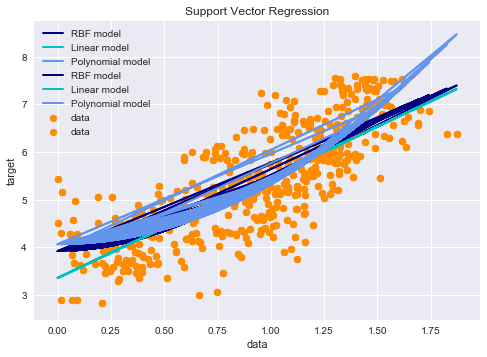

In [38]:
from sklearn.svm import SVR


# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X_train, y, color='darkorange', label='data')
plt.plot(X_train, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_train, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_train, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

C:\Users\Brad Eledge\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


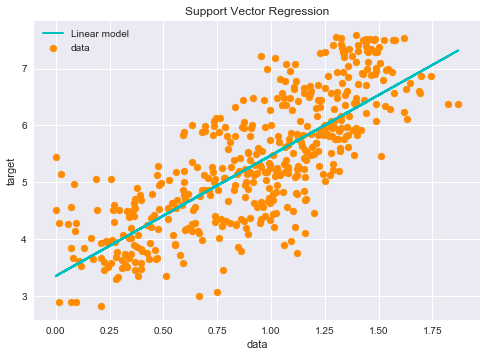

In [39]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_Economy, y).predict(X_Economy)
y_lin = svr_lin.fit(X_Economy, y).predict(X_Economy)
y_poly = svr_poly.fit(X_Economy, y).predict(X_Economy)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X_Economy, y, color='darkorange', label='data')

plt.plot(X_Economy, y_lin, color='c', lw=lw, label='Linear model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [46]:
svr_lin.score(X_Economy, y)

0.61214057359273144

In [43]:
svr_lin.get_params()

{'C': 1000.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}